# Clustering(Lesson 3)
## Agglomerative (part 1)

### First of all import needed packages

In [55]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance_matrix
from sklearn import manifold , datasets
from sklearn.datasets import make_blobs
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np
# Use this to show matplotlib and plots properly(But not essential)
%matplotlib inline

### Create dataset

In [44]:
# This creates 50 samples around 4 clusters with (x,y)
X1 , Y1 = make_blobs(n_samples=50,centers=[[4,4],[-2,-1],[1,1],[10,4]],cluster_std=0.9)

In [45]:
print('Xs :\n',X1[0:5])
print('----------------')
print('Ys :\n',Y1[0:5])

Xs :
 [[4.61205749 3.0780786 ]
 [9.27628134 2.76944147]
 [0.23614899 1.45034364]
 [9.59984621 3.14841598]
 [3.92022843 4.63522751]]
----------------
Ys :
 [0 3 2 3 0]


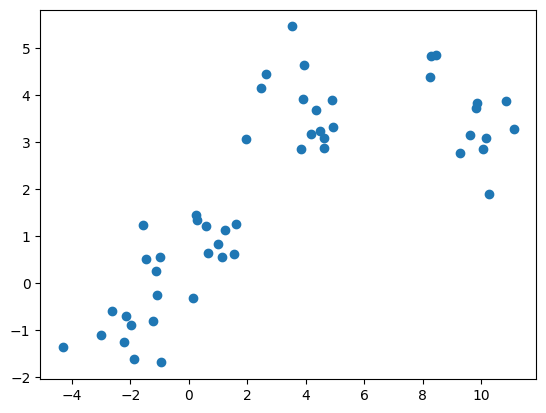

In [46]:
plt.scatter(X1[:,0],X1[:,1],marker='o')

### Create and run your model

In [47]:
Agglomerative_clustering = AgglomerativeClustering(n_clusters=4,linkage='average')

In [48]:
Agglomerative_clustering.fit(X1,Y1)

,n_clusters,4
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'average'
,distance_threshold,None
,compute_distances,False


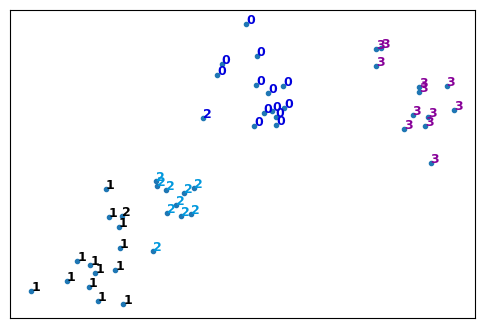

In [49]:
plt.figure(figsize=(6,4))
X_min , X_max = np.min(X1,axis=0) , np.max(X1,axis=0)
# Everything between 0 and 1(normalizing)
X1_ = (X1 - X_min) / (X_max - X_min)
for i in range(X1_.shape[0]) :
    plt.text(X1_[i,0],X1_[i,1],str(Y1[i]),
             color=plt.cm.nipy_spectral(Agglomerative_clustering.labels_[i]/10.),
            fontdict={'weight':'bold','size':9})
plt.xticks([])
plt.yticks([])
plt.scatter(X1_[:,0],X1_[:,1],marker='.')
plt.show()

In [51]:
Distance_matrix = distance_matrix(X1,X1)
print(Distance_matrix)

[[ 0.          4.67442414  4.66884315 ...  7.32583049  6.13569064
   4.05128647]
 [ 4.67442414  0.          9.13586406 ... 11.15353612 10.49472778
   2.29342216]
 [ 4.66884315  9.13586406  0.         ...  3.36090586  1.50962859
   8.71122936]
 ...
 [ 7.32583049 11.15353612  3.36090586 ...  0.          2.2573461
  11.28694392]
 [ 6.13569064 10.49472778  1.50962859 ...  2.2573461   0.
  10.18627943]
 [ 4.05128647  2.29342216  8.71122936 ... 11.28694392 10.18627943
   0.        ]]


In [53]:
Z = hierarchy.linkage(Distance_matrix,'complete')

C:\Users\veniz\AppData\Local\Temp\ipykernel_5936\2125480387.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(Distance_matrix,'complete')


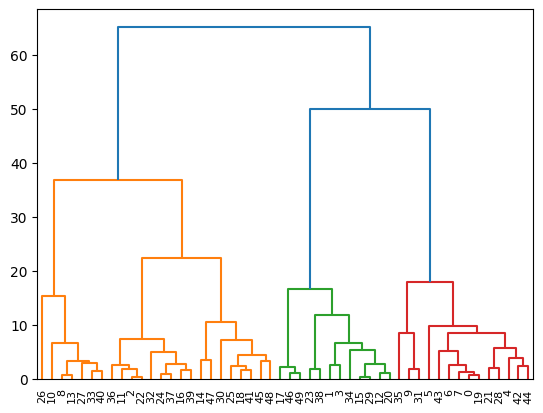

In [56]:
Dendrogram = hierarchy.dendrogram(Z)